# Tmall Order Report EDA Analysis
This notebook performs an exploratory data analysis (EDA) on the Tmall order report dataset.

In [1]:
# Step 1: Data Loading
import pandas as pd
import os

file_path = 'tmall_order_report.csv'
df = pd.read_csv(os.path.join('../data', file_path))

print(df.head())
print("Data shape:", df.shape)
print("Column names:", df.columns.tolist())

   订单编号    总金额  买家实际支付金额   收货地址                订单创建时间              订单付款时间   \
0     1  178.8       0.0      上海  2020-02-21 00:00:00                  NaN   
1     2   21.0      21.0  内蒙古自治区  2020-02-20 23:59:54  2020-02-21 00:00:02   
2     3   37.0       0.0     安徽省  2020-02-20 23:59:35                  NaN   
3     4  157.0     157.0     湖南省  2020-02-20 23:58:34  2020-02-20 23:58:44   
4     5   64.8       0.0     江苏省  2020-02-20 23:57:04  2020-02-20 23:57:11   

   退款金额  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4  64.8  
Data shape: (28010, 7)
Column names: ['订单编号', '总金额', '买家实际支付金额', '收货地址 ', '订单创建时间', '订单付款时间 ', '退款金额']


In [2]:
# Step 2: Data Cleaning
# Check for missing values
print("Missing values:", df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check for anomalies (e.g., negative order amounts)
if 'order_amount' in df.columns:
    print("Anomalies in order amount:", df[df['order_amount'] <= 0].shape[0])

Missing values: 订单编号           0
总金额            0
买家实际支付金额       0
收货地址           0
订单创建时间         0
订单付款时间      3923
退款金额           0
dtype: int64
Duplicate rows: 0


               订单编号            总金额      买家实际支付金额          退款金额
count  28010.000000   28010.000000  28010.000000  28010.000000
mean   14005.500000     106.953253     67.921712     20.433271
std     8085.934856    1136.587094    151.493434     71.501963
min        1.000000       1.000000      0.000000      0.000000
25%     7003.250000      38.000000      0.000000      0.000000
50%    14005.500000      75.000000     45.000000      0.000000
75%    21007.750000     119.000000    101.000000      0.000000
max    28010.000000  188320.000000  16065.000000   3800.000000


/Users/circle/Desktop/heywhale/agents.nosync/notebook_agent/.conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/circle/Desktop/heywhale/agents.nosync/notebook_agent/.conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/circle/Desktop/heywhale/agents.nosync/notebook_agent/.conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/circle/Desktop/heywhale/agents.nosync/notebook_agent/.conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/circle/Desktop/heywhale/agents.nosync/notebook_agent/.conda/lib/python3.11/si

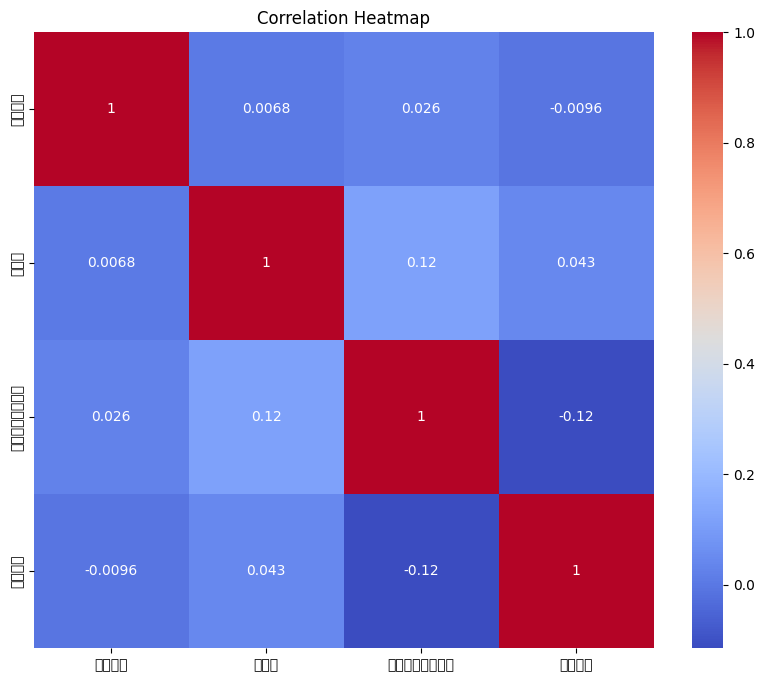

In [4]:
# Step 3: Exploratory Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(df.describe())

# Time Analysis (if 'order_date' column exists)
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['order_month'] = df['order_date'].dt.to_period('M')
    monthly_orders = df.groupby('order_month').size()
    plt.figure(figsize=(10, 5))
    monthly_orders.plot(kind='line', marker='o')
    plt.title('Monthly Order Trends')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.grid()
    plt.show()

# Distribution of Order Amounts
if 'order_amount' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['order_amount'], kde=True)
    plt.title('Distribution of Order Amounts')
    plt.xlabel('Order Amount')
    plt.ylabel('Frequency')
    plt.show()

# Boxplot of Order Amounts by Category (if 'category' column exists)
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='category', y='order_amount')
    plt.title('Order Amount Distribution by Category')
    plt.xticks(rotation=45)
    plt.show()

# Correlation Analysis (numeric columns only)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Step 4: Conclusion
Summarize key findings from the EDA.